In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

 <h1><center>Influência do clima nos casos de COVID-19 </h1></center>
O presente estudo busca verificar qual o impacto da temperatura e umidade no surgimento de novos casos de COVID-19 em Fortaleza. As medições climáticas foram feitas entre 11/05 e 17/05, considerando um intervalo de 9 dias para a contabilização dos novos casos.
 
 
 <h6> Fonte dos dados climáticos- </h6>http://www.funceme.br/
  <h6> Fonte do número de casos -</h6> https://integrasus.saude.ce.gov.br/

In [224]:
data=pd.read_csv("datasetclima.csv")

In [225]:
data

,Bairro,Novoscasos,Temperatura,Umidade
0,97,97,27.210013,67.554247
1,45,45,31.517363,71.991503
2,52,52,29.531416,70.806768
3,19,19,33.173017,75.511725
4,27,27,32.692186,74.435098
...,...,...,...,...
111,68,68,28.174725,69.067330
112,14,14,35.016900,74.876663
113,11,11,35.071949,75.931192
114,6,6,35.141412,75.187618


 <h2>Temperatura</h2>

<Figure size 432x288 with 0 Axes>

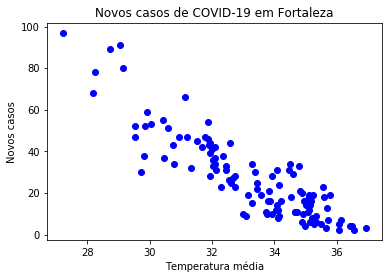

<Figure size 432x288 with 0 Axes>

In [226]:
plt.scatter(data['Temperatura'],data['Novoscasos'],color='b') 
plt.xlabel('Temperatura média') 
plt.ylabel('Novos casos') 
plt.title('Novos casos de COVID-19 em Fortaleza') 
plt.figure() 
 

In [227]:
X = data['Temperatura'].values.reshape(-1, 1)
y = data['Novoscasos'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

print(f" A lei de formação é: \n Casos = {reg.intercept_[0]} + {reg.coef_[0][0]}*Temperatura")

 A lei de formação é: 
 Casos = 306.5577990030333 + -8.40083639513763*Temperatura


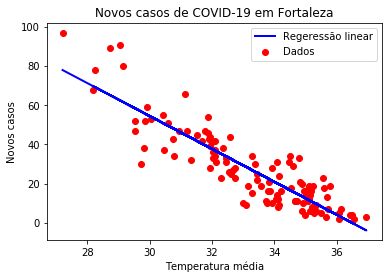

In [228]:
 
plt.scatter(X, y, color='red',label='Dados')
plt.plot(X, reg.predict(X) , c='blue', linewidth=2,label='Regeressão linear')
plt.xlabel('Temperatura média') 
plt.ylabel('Novos casos') 
plt.title('Novos casos de COVID-19 em Fortaleza')
plt.legend()
plt.show()

In [229]:
X =  data['Temperatura']
y = data['Novoscasos']
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Novoscasos   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     415.7
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           7.94e-40
Time:                        13:43:03   Log-Likelihood:                -423.63
No. Observations:                 116   AIC:                             851.3
Df Residuals:                     114   BIC:                             856.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5578     13.724     22.338      

 <h2>Umidade</h2>

<Figure size 432x288 with 0 Axes>

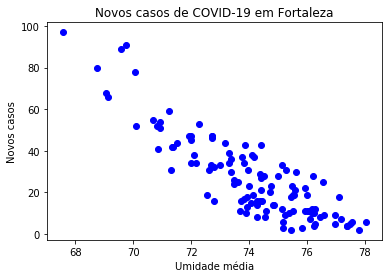

<Figure size 432x288 with 0 Axes>

In [230]:
plt.scatter(data['Umidade'],data['Novoscasos'],color='b') 
plt.xlabel('Umidade média') 
plt.ylabel('Novos casos') 
plt.title('Novos casos de COVID-19 em Fortaleza') 
plt.figure() 
 

In [231]:
X = data['Umidade'].values.reshape(-1, 1)
y = data['Novoscasos'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

print(f"A lei de formação é:: \n Casos = {reg.intercept_[0]} + {reg.coef_[0][0]}*Umidade")

A lei de formação é:: 
 Casos = 621.1089086983936 + -8.020799951203047*Umidade


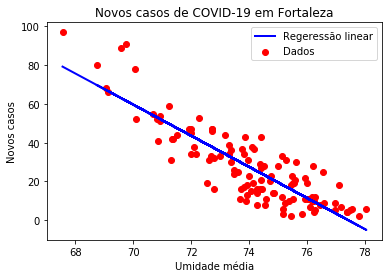

In [232]:
 
plt.scatter(X, y, color='red',label='Dados')
plt.plot(X, reg.predict(X) , c='blue', linewidth=2,label='Regeressão linear')
plt.xlabel('Umidade média') 
plt.ylabel('Novos casos') 
plt.title('Novos casos de COVID-19 em Fortaleza')
plt.legend()
plt.show()

In [233]:
X =  data['Umidade']
y = data['Novoscasos']
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Novoscasos   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     346.6
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           2.32e-36
Time:                        13:43:10   Log-Likelihood:                -431.73
No. Observations:                 116   AIC:                             867.5
Df Residuals:                     114   BIC:                             873.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        621.1089     31.906     19.467      0.0

 <h2>Análise bivariada</h2>

In [234]:
X = np.column_stack((data['Umidade'], data['Temperatura']))
y = data['Novoscasos'].values.reshape(-1,1)
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     345.7
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           6.94e-49
Time:                        13:43:13   Log-Likelihood:                -398.89
No. Observations:                 116   AIC:                             803.8
Df Residuals:                     113   BIC:                             812.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        500.7558     27.410     18.269      0.0

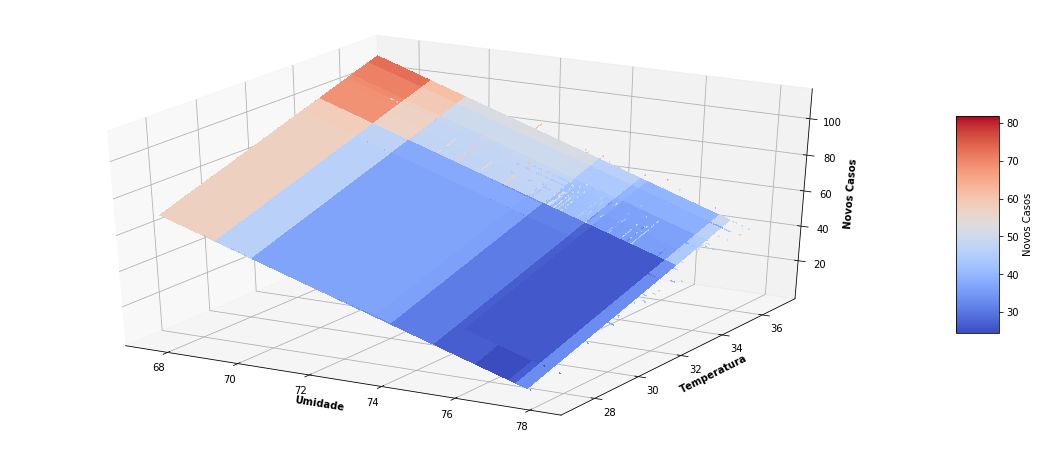

In [235]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize =(20,8))
ax = fig.gca(projection='3d')

# Make data.
X = data['Umidade']
Y = data['Temperatura']
X, Y = np.meshgrid(X, Y)
R = 394.6352 -6.6323*X + 4.5245*Y
Z = np.array(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5,label='Novos Casos')
ax.set_xlabel('Umidade',weight="bold")
ax.set_ylabel('Temperatura',weight="bold")
ax.set_zlabel('Novos Casos',weight="bold")  
plt.show()

 #EsqueceaFiocruzLaFora